<a href="https://colab.research.google.com/github/eunzzae/Study_DS/blob/main/23)_%EC%86%8C%EB%93%9D_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 소득 예측
>**목차**

* 문제상황 및 데이터 살펴보기  
* 문제해결 프로세스 정의  
1) 성별 구성비 확인  
2) 가설 수립 및 검증  
3) ML활용 소득 예측

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# # ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
# import os
# os.chdir('/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter23')
# # '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter23' ← 변경X
# os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 문제상황 및 데이터 살펴보기
---
> **시나리오** 🤑 (HRD/HRM)

```
A사는 이번에 새롭게 회사를 런칭하게 되어 급여체계를 새로 수립해야하는 상황이다. 새로운 비지니스에 진출을 하기 때문에 대규모 채용을  
진행할 예정이다. 이에 직급별 직무별 급여 Band를 수립하기 위해 지원자들의 프로필 정보와 자산에 대한 데이터를 활용하여 급여를 예측하는 모델을  
만들고, 급여 Band 설정에 Base data로 활용하고자 한다.

```  

> **데이터 살펴보기**

* 소득 관련 데이터
* 데이터 명세 ⬇

|age|workclass|fnlwgt|education|education.num|marital.status|  
|:---:|:---:|:---:|:---:|:---:|:---:|
|나이|직업군|인구학적특성통계(비슷한 부류끼리는 동일 수준)|교육수준|교육수준 구분|결혼상태|
|occupation|relationship|race|sex|capital.gain|capital.loss|
|직업|가족관계|인종|성별|자산이익|자산손실|
|hours.per.week|native.country|income
|주근무시간|국적|소득|


In [2]:
# Data read
import pandas as pd
bath = '/content/drive/MyDrive/[STUDY] 데이터사이언스/데이터분석/data/chapter23_소득 예측/'
df = pd.read_csv(bath + 'chapter23_income.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K



## **문제해결 프로세스 정의**
---
> **문제정의**

```
신규 비지니스 진출로 인한 급여 Band 부재
```  

> **기대효과**

```
급여 Band 신설로 채용 기반 준비
```

> **해결방안**

```
소득 예측 모델 활용 지원자 급여 Band Base 체계 구축
Session 1
 - Data 전처리 및 기본 Data 확인
Session 2
 - 가설 수립 후 해당 가설을 검증하기 위한 데이터 탐색
Session 3
 - ML 알고리즘을 활용하여 급여 예측
```

> **성과측정**  

```
채용예산 적정 사용
```

> **현업적용**  

```
신규 지원자 프로필 정보 활용, 급여 Band 예측 및 협상 자료 활용
```

> **주요 코드 미리 살펴보기**  

```
session 1 → np.where, groupby.agg()
session 2 → np.where, groupby.agg(), sns.lineplot
session 3 → Binarizer, RandomForestClassifier(), LabelEncoder(), roc_auc_score, roc_curve
```

## Session 1
## 성별 구성비 확인

### Data 전처리
---

In [3]:
# Data shape
# 32,561 row, 15 col로 구성
print('df', df.shape)

df (32561, 15)


In [4]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# null 확인
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
# outlier 확인
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# ? 데이터 처리
df.replace('?', 'none', inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,none,77053,HS-grad,9,Widowed,none,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,none,186061,Some-college,10,Widowed,none,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 인구통계학적 특성 분석
---


In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,none,77053,HS-grad,9,Widowed,none,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,none,186061,Some-college,10,Widowed,none,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
# Target Data 확인
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [11]:
# 50K 초과 인구는 24% 분포
7841/(24720+7841)

0.2408095574460244

In [12]:
# >50K는 고소득자 1, <=50 저소득자 0
import numpy as np
df['income'] = np.where(df['income']=='>50K', 1, 0)
df['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

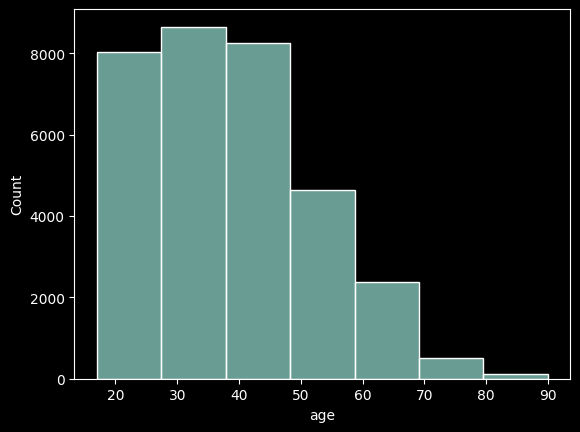

In [21]:
# Age 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.histplot(df['age'], bins=7)

In [14]:
# 구간화
df['age_gp'] =np.where(df['age']<= 30, '30 이하',
         np.where(df['age']<=40, '30대-40대', '40대 이상'))
df[['age','age_gp']]

,age,age_gp
0,90,40대 이상
1,82,40대 이상
2,66,40대 이상
3,54,40대 이상
4,41,40대 이상
...,...,...
32556,22,30 이하
32557,27,30 이하
32558,40,30대-40대
32559,58,40대 이상


In [22]:
# 연령에 따른 고소득 비율
df_gp = df.groupby('age_gp')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
age_gp,,,
30 이하,10572,682,6.5
30대-40대,8546,2406,28.2
40대 이상,13443,4753,35.4


In [24]:
# 성별 고소득 비율
df_gp = df.groupby('sex')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
sex,,,
Female,10771,1179,10.9
Male,21790,6662,30.6


In [25]:
# 가족관계에 따른 고소득 비율
df_gp = df.groupby('relationship')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
relationship,,,
Husband,13193,5918,44.9
Not-in-family,8305,856,10.3
Other-relative,981,37,3.8
Own-child,5068,67,1.3
Unmarried,3446,218,6.3
Wife,1568,745,47.5


In [26]:
# 결혼 유형에 따른 고소득 비율
df_gp = df.groupby('marital.status')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
marital.status,,,
Divorced,4443,463,10.4
Married-AF-spouse,23,10,43.5
Married-civ-spouse,14976,6692,44.7
Married-spouse-absent,418,34,8.1
Never-married,10683,491,4.6
Separated,1025,66,6.4
Widowed,993,85,8.6


## Session 2
## 가설 수립 및 검증

### Hypothesis (1)
---
* 자산 소득 + 자산 손실의 값에 따라 고소득 비율이 다를 것이다.  
* 자산 Net 값이 높다면 자산관리(재테크)를 잘하고 있다고 볼 수 있다.

In [27]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_gp
0,90,none,77053,HS-grad,9,Widowed,none,Not-in-family,White,Female,0,4356,40,United-States,0,40대 이상
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,40대 이상
2,66,none,186061,Some-college,10,Widowed,none,Unmarried,Black,Female,0,4356,40,United-States,0,40대 이상
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,40대 이상
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,40대 이상


In [29]:
# 총 자산 sum col 생성
df['capital_sum'] = df['capital.gain'] - df['capital.loss']
df[['capital.gain', 'capital.loss', 'capital_sum']].head()

,capital.gain,capital.loss,capital_sum
0,0,4356,-4356
1,0,4356,-4356
2,0,4356,-4356
3,0,3900,-3900
4,0,3900,-3900


<Axes: xlabel='capital_sum', ylabel='Density'>

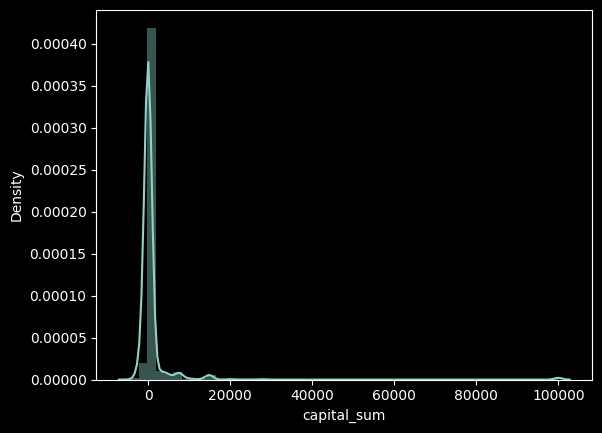

In [30]:
# capital_sum 분포 확인
sns.distplot(df['capital_sum'])

In [32]:
# 구간화
df['capital_sum_gp'] = np.where(df['capital_sum']<=0, '0 이하',
         np.where(df['capital_sum']<= 10000, '0-10,000 이하', '10,000 초과'))
df[['capital_sum', 'capital_sum_gp']].head()

,capital_sum,capital_sum_gp
0,-4356,0 이하
1,-4356,0 이하
2,-4356,0 이하
3,-3900,0 이하
4,-3900,0 이하


In [34]:
# 고소득 비율 -> 크리티컬한 변수
df_gp = df.groupby('capital_sum_gp')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
capital_sum_gp,,,
0 이하,29849,6164,20.7
"0-10,000 이하",1942,921,47.4
"10,000 초과",770,756,98.2


### Hypothesis (2)
---
* 나이가 어려도 고학력자면 고소득일 것이다.

In [35]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_gp,capital_sum,capital_sum_gp
0,90,none,77053,HS-grad,9,Widowed,none,Not-in-family,White,Female,0,4356,40,United-States,0,40대 이상,-4356,0 이하
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,40대 이상,-4356,0 이하
2,66,none,186061,Some-college,10,Widowed,none,Unmarried,Black,Female,0,4356,40,United-States,0,40대 이상,-4356,0 이하
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,40대 이상,-3900,0 이하
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,40대 이상,-3900,0 이하


In [37]:
# 연령대에 따른 고소득 비율
df_gp = df.groupby('age_gp')['income'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
age_gp,,,
30 이하,10572,682,6.5
30대-40대,8546,2406,28.2
40대 이상,13443,4753,35.4


In [39]:
# 연령, 고학력 수준에 따른 고소득 비율
# 한눈에 파악하기 힘듦.
df_gp = df.groupby(['age_gp', 'education.num'])['income'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

count   sum  ratio
age_gp  education.num                    
30 이하   1                 12     0    0.0
        2                 30     0    0.0
        3                 92     1    1.1
        4                114     2    1.8
        5                158     2    1.3
        6                391     1    0.3
        7                644    12    1.9
        8                235     4    1.7
        9               3276   135    4.1
        10              3065   131    4.3
        11               389    42   10.8
        12               325    29    8.9
        13              1559   254   16.3
        14               199    47   23.6
        15                61    15   24.6
        16                22     7   31.8
30대-40대 1                 13     0    0.0
        2                 35     0    0.0
        3                 59     4    6.8
        4                 95     7    7.4
        5                116     7    6.0
        6                175    13    7.4
        7                206    12    5.8
        8                 82     9   11.0
        9               2882   490   17.0
        10              1702   401   23.6
        11               462   130   28.1
        12               369   107   29.0
        13              1614   762   47.2
        14               463   258   55.7
        15               171   137   80.1
        16               102    69   67.6
40대 이상  1                 26     0    0.0
        2                103     6    5.8
        3                182    11    6.0
        4                437    31    7.1
        5                240    18    7.5
        6                367    48   13.1
        7                325    36   11.1
        8                116    20   17.2
        9               4343  1050   24.2
        10              2524   855   33.9
        11               531   189   35.6
        12               373   129   34.6
        13              2182  1205   55.2
        14              1061   654   61.6
        15               344   271   78.8
        16               289   230   79.6

In [41]:
df_gp = pd.DataFrame(df_gp.reset_index())
df_gp.head()

,age_gp,education.num,count,sum,ratio
0,30 이하,1,12,0,0.0
1,30 이하,2,30,0,0.0
2,30 이하,3,92,1,1.1
3,30 이하,4,114,2,1.8
4,30 이하,5,158,2,1.3


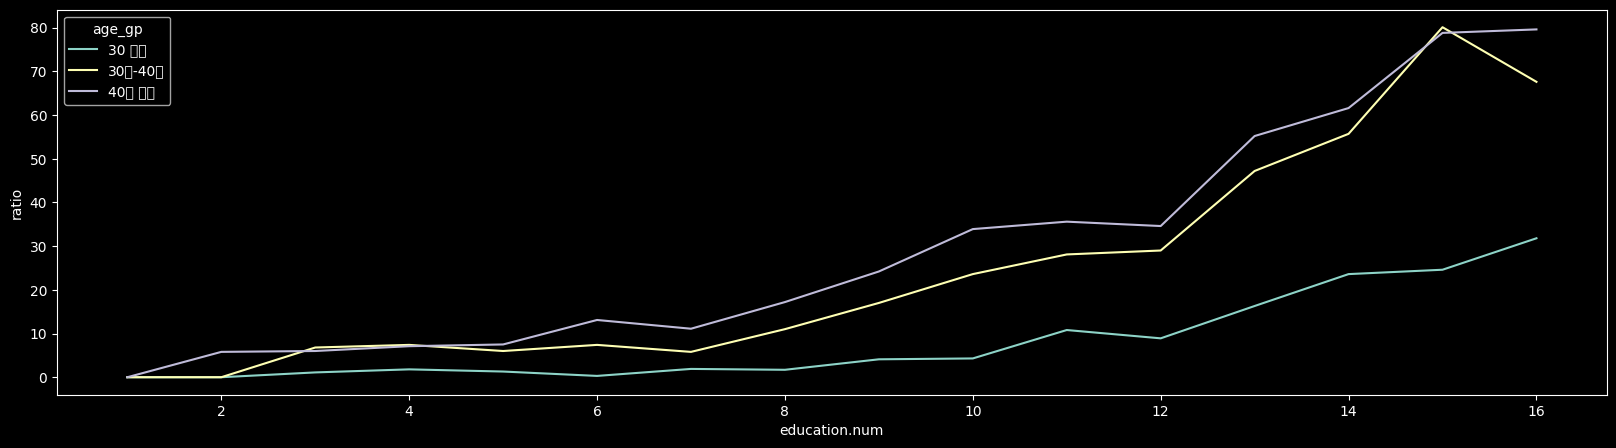

In [42]:
# 연령이 증가할수록 고소득 비율이 높지만, 30-40대와 40대 초과 지원자 사이에 Gap은 고학력으로 갈수록 줄어드는 것을 확인할 수 있음.
sns.lineplot(x='education.num', y='ratio', hue='age_gp', data=df_gp);
plt.gcf().set_size_inches(20, 5)

### Hypothesis (3)
---
* 인구 통계학적 특성에 따라 고소득 비율이 다를 것이다.

In [43]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_gp,capital_sum,capital_sum_gp
0,90,none,77053,HS-grad,9,Widowed,none,Not-in-family,White,Female,0,4356,40,United-States,0,40대 이상,-4356,0 이하
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,40대 이상,-4356,0 이하
2,66,none,186061,Some-college,10,Widowed,none,Unmarried,Black,Female,0,4356,40,United-States,0,40대 이상,-4356,0 이하
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,40대 이상,-3900,0 이하
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,40대 이상,-3900,0 이하


<Axes: xlabel='fnlwgt', ylabel='Density'>

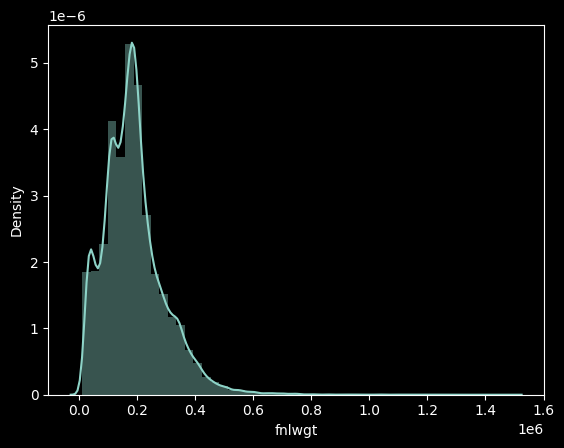

In [45]:
# fnlwgt(인구통계학특성 수치) 분포 확인
sns.distplot(df['fnlwgt'])

In [47]:
0.1*10**6

100000.0

In [50]:
# 구간화
df['fnlwgt_gp']= np.where(df['fnlwgt']<=0.1*10**6, '100,000 이하',
         np.where(df['fnlwgt']<=0.3*10**6, '100,000-300,000 이하', '300,000 초과'))
df[['fnlwgt','fnlwgt_gp']].head()

,fnlwgt,fnlwgt_gp
0,77053,"100,000 이하"
1,132870,"100,000-300,000 이하"
2,186061,"100,000-300,000 이하"
3,140359,"100,000-300,000 이하"
4,264663,"100,000-300,000 이하"


In [52]:
# 수치의 증가에 따라 증가하는 경향을 보이지는 않음.
df_gp = df.groupby('fnlwgt_gp')['income'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
fnlwgt_gp,,,
"100,000 이하",5670,1288,22.7
"100,000-300,000 이하",22479,5505,24.5
"300,000 초과",4412,1048,23.8


## Session 3
## ML 활용 소득 예측

### 모델링을 위한 데이터 준비
---

In [53]:
# numeric, categorical value 나누기
numeric_list = []
categorical_list = []
for col in df.columns:
  if df[col].dtype != 'object':
    numeric_list.append(col)
  else:
    categorical_list.append(col)

print('categorical_list :', categorical_list)
print('numeric_list :', numeric_list)

categorical_list : ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'age_gp', 'capital_sum_gp', 'fnlwgt_gp']
numeric_list : ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income', 'capital_sum']


In [54]:
# 모델링을 학습하기 위한 Fearue(X)와 Y데이터를 구분하는 단계
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['age_gp', 'capital_sum_gp', 'fnlwgt_gp', 'education.num', 'income'], axis=1)
Y=df['income']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(22792, 14)
(22792,)
(9769, 14)
(9769,)


In [55]:
# EDA 시 만든 변수 사전 제거
categorical_list.remove('age_gp')
categorical_list.remove('capital_sum_gp')
categorical_list.remove('fnlwgt_gp')

In [56]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_list :
  print(col)
  le = LabelEncoder()
  le.fit(list(x_train[col].values) + list(x_test[col].values))
  x_train[col] = le.transform(x_train[col])
  x_test[col] = le.transform(x_test[col])

workclass
education
marital.status
occupation
relationship
race
sex
native.country


### 모델 학습 및 평가
---

In [57]:
from sklearn.metrics import classification_report

# 학습
rfc = RandomForestClassifier(random_state =123456, max_depth=6)
rfc.fit(x_train, y_train)

# 예측
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     17303
           1       0.96      0.29      0.45      5489

    accuracy                           0.83     22792
   macro avg       0.89      0.64      0.67     22792
weighted avg       0.85      0.83      0.79     22792

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      7417
           1       0.97      0.29      0.44      2352

    accuracy                           0.83      9769
   macro avg       0.89      0.64      0.67      9769
weighted avg       0.85      0.83      0.79      9769



In [58]:
pd.Series(y_pred_test).value_counts()

0    9073
1     696
Name: count, dtype: int64

In [65]:
from sklearn.preprocessing import Binarizer
# threshold를 증가시키면, 진짜 정답일 데이터를 예측할 것이므로 precision 값이 증가 (※ 예측하는 개수 감소)
# threshold를 감소시키면, 조금 이라도 가능성이 있는 정답을 더 많이 예측하므로 recall 값이 증가 (※ 예측하는 개수 증가)

Input_threshold = 0.4

pred_proba_test = rfc.predict_proba(x_test)[:,1].reshape(-1,1)
custom_predict = Binarizer(threshold=Input_threshold).fit_transform(pred_proba_test)

# 성능평가 확인
print(classification_report(y_test, custom_predict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7417
           1       0.69      0.59      0.64      2352

    accuracy                           0.84      9769
   macro avg       0.79      0.75      0.77      9769
weighted avg       0.83      0.84      0.83      9769



In [66]:
pd.Series(custom_predict.reshape(-1)).value_counts()

0.0    7780
1.0    1989
Name: count, dtype: int64

In [67]:
1989/9769

0.20360323472208006

In [68]:
# 과적합 문제, Train과 Test set에 성능을 최대한 줄여주는 것이 과적합을 방지
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.8990116752132142
roc_score_test : 0.893279561386372


In [69]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

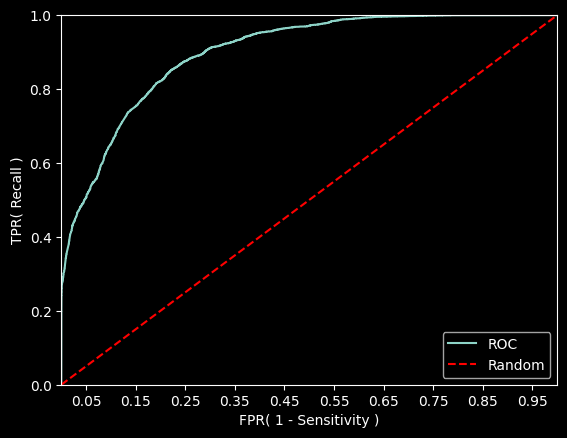

In [70]:
roc_curve_plot(y_train, y_pred_train_proba)

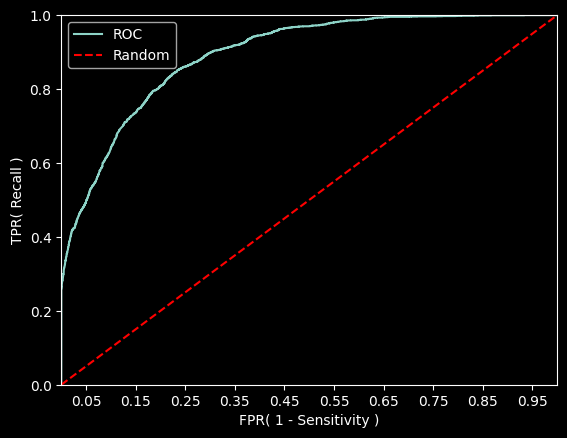

In [71]:
roc_curve_plot(y_test, y_pred_test_proba)

### 중요 변수 파악
---


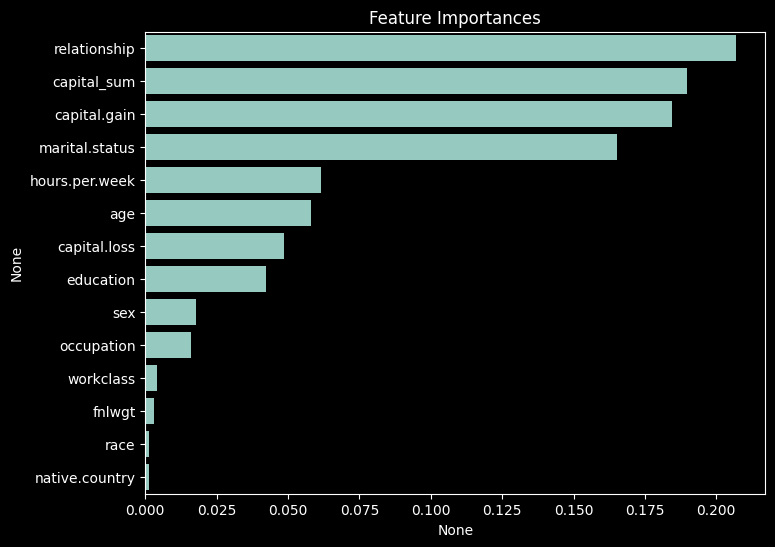

In [72]:

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.rc('xtick', labelsize=5)
plt.show()

In [73]:
# 1순위 후보 탐색
# 가족관계에 따른 고소득 비율
df_gp = df.groupby('relationship')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
relationship,,,
Husband,13193,5918,44.9
Not-in-family,8305,856,10.3
Other-relative,981,37,3.8
Own-child,5068,67,1.3
Unmarried,3446,218,6.3
Wife,1568,745,47.5


In [74]:
df_gp = df.groupby('capital_sum_gp')['income'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
capital_sum_gp,,,
0 이하,29849,6164,20.7
"0-10,000 이하",1942,921,47.4
"10,000 초과",770,756,98.2


### 모델 save and read
---

In [75]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfc)

# 모델 Read
clf_from_pickle = pickle.loads(saved_model)

In [ ]:
# 현업 운영시 꼭 마지막 예측 값을 붙여줘야함!
x_test.head(5)

In [ ]:
custom_predict.reshape(-1)

In [ ]:
x_test['Y'] = custom_predict.reshape(-1)
x_test[x_test['Y'] == 1.0]